In [11]:
library("foreign")
library("tidyverse")
library("reshape2")

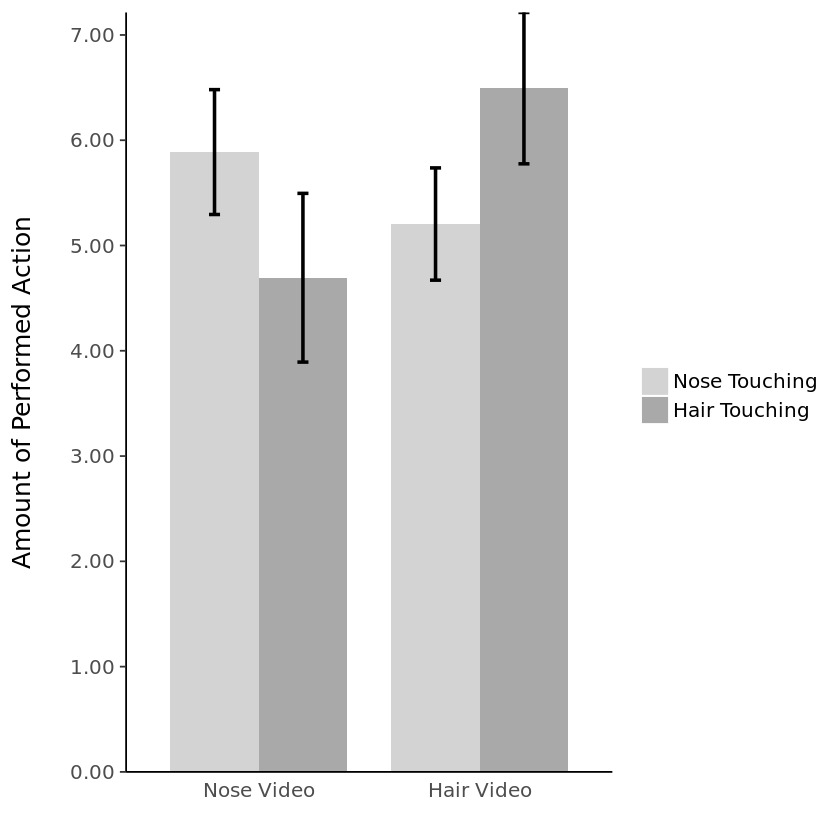

In [18]:
data = read.spss("https://osf.io/5ze9k/download",to.data.frame=TRUE)
noseTwNosev = data$NoseVideo_NoseTouching
hairTwNosev = data$NoseVideo_HairTouching
noseTwHairv = data$HairVideo_NoseTouching
hairTwHairv = data$HairVideo_HairTouching
meanNWH = mean(noseTwHairv)
meanNWN = mean(noseTwNosev)
meanHWH = mean(hairTwHairv)
meanHWN = mean(hairTwNosev)

getSE = function(values){
  n = length(values)
  st_dev = sd(values)
  SE = st_dev/sqrt(n)
  return(SE)
}

getConfIntvl = function(values){
  n = length(values)
  mn = mean(values)
  SE = getSE(values)
  df = n-1
  t = abs(qt(.15,df))
  lower = mn -(t*SE)
  upper = mn + (t*SE)
  return(c(lower,upper))
}

NWHConf = getConfIntvl(noseTwHairv)
NWNConf = getConfIntvl(noseTwNosev)
HWHConf = getConfIntvl(hairTwHairv)
HWNConf = getConfIntvl(hairTwNosev)

data = tribble(
  ~action, ~touched, ~video, ~lower, ~upper,
  meanNWH, "Nose Touching", "Hair Video",NWHConf[1],NWHConf[2],
  meanHWH, "Hair Touching", "Hair Video",HWHConf[1],HWHConf[2],
  meanNWN, "Nose Touching", "Nose Video",NWNConf[1],NWNConf[2],
  meanHWN, "Hair Touching", "Nose Video",HWNConf[1],HWNConf[2]
)
conf = tribble(
  ~video, 
   "Nose Touching", NWHConf[1],NWHConf[2],
  "Hair Touching", HWHConf[1],HWHConf[2],
  "Nose Touching", NWNConf[1],NWNConf[2],
  "Hair Touching", HWNConf[1],HWNConf[2]
)
scaleFUN <- function(x) sprintf("%.2f", x)
data$touched = factor(data$touched)
data$touched = factor(data$touched, levels = rev(levels(data$touched)))
gg = melt(data,id =2:3)
ggplot(data,aes(x=video,y=action,fill=touched)) +
  geom_bar(width = .8, stat = "identity",position = "dodge")+
  geom_errorbar(aes(ymin=lower, ymax=upper ), size = 1, width = .1, position = position_dodge(width = .8),color = "black") +
  ylab("Amount of Performed Action\n")+
  xlab("")+
  theme_set(theme_gray(base_size = 15))+
  theme(axis.ticks.x = element_blank(),legend.title = element_blank(),panel.background = element_blank(),axis.line = element_line(colour = "black"))+
  scale_fill_manual("legend", values = c("Nose Touching" = "light grey", "Hair Touching" = "dark grey"))+
  scale_x_discrete(limits = rev(levels(factor(gg$video))))+
  scale_y_continuous(expand = c(0,0),labels =scaleFUN, breaks = c(0:8) )